# Setup 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import json
import pandas as pd

In [4]:
ROOT_DIR = '../../'
import sys
sys.path.insert(0, ROOT_DIR)

import eval_utils

## Define models to eval 

In [5]:
EVAL_DATASET = 'rf-typicality-unishape'
MODEL_TYPE = 'contextual'

In [6]:
eval_results = eval_utils.load_eval_results(EVAL_DATASET, MODEL_TYPE, listener_types=['val'])

# Vocab Distribution 

In [7]:
listener_type = 'val' # pick 'val' since there's only one val listener regardless of speaker type; when there are multiple listeners there are nested dicts in `eval_results`
vocab_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

In [8]:
dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in vocab_dist]

<AxesSubplot:ylabel='Proportion'>

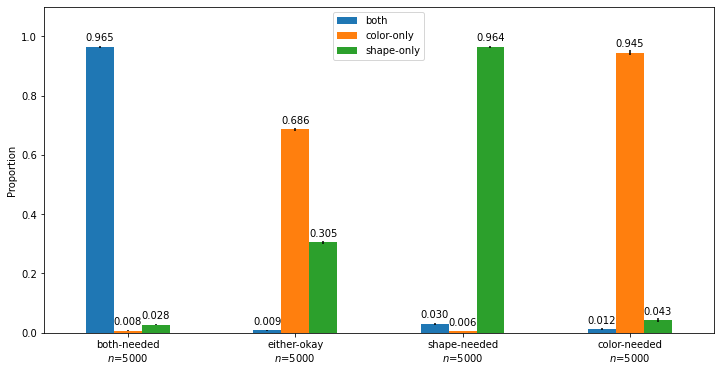

In [9]:
eval_utils.visualize_utterance_distribution(dist_per_speaker)

### When target is red circle

<AxesSubplot:ylabel='Proportion'>

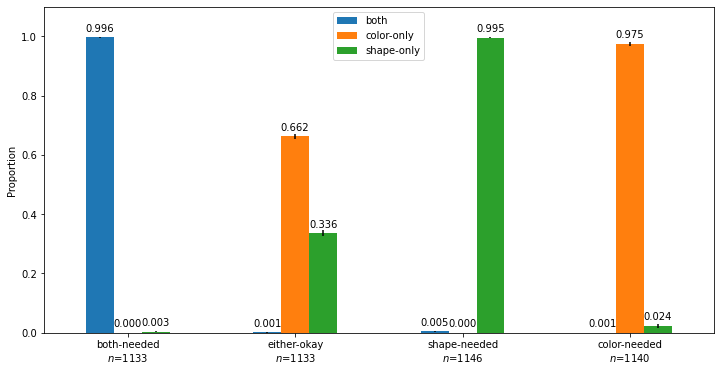

In [10]:
red_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
red_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_circle_dist]
eval_utils.visualize_utterance_distribution(red_circle_dist_per_speaker)

### Target is non-red circle 

<AxesSubplot:ylabel='Proportion'>

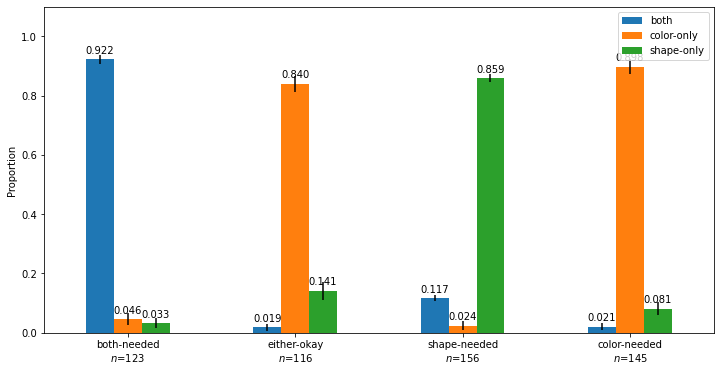

In [11]:
nonred_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
nonred_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_circle_dist]
eval_utils.visualize_utterance_distribution(nonred_circle_dist_per_speaker)

### Target is red non-circle 

<AxesSubplot:ylabel='Proportion'>

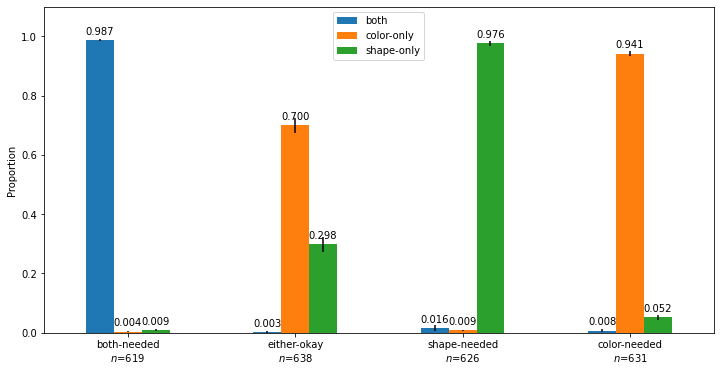

In [12]:
red_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
red_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_noncircle_dist]
eval_utils.visualize_utterance_distribution(red_noncircle_dist_per_speaker)

### Target is neither red nor circle

<AxesSubplot:ylabel='Proportion'>

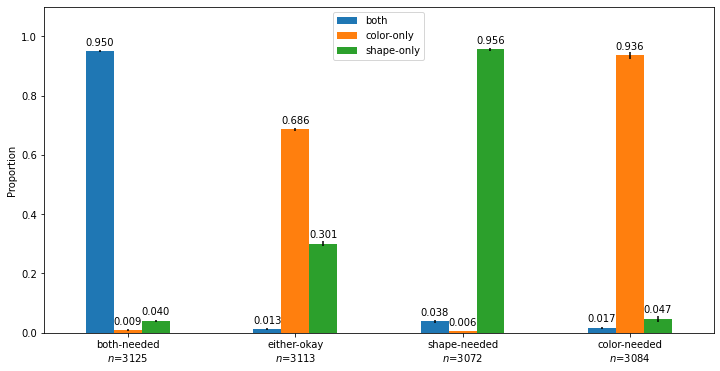

In [13]:
nonred_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
nonred_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_noncircle_dist]
eval_utils.visualize_utterance_distribution(nonred_noncircle_dist_per_speaker)

# Accuracy

In [14]:
gt_referents = eval_results[0]['all_referents']

## Val listener

In [15]:
val_accuracy_per_speaker = [eval_utils.analyze_accuracy(curr_speaker_results['val'], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

../../eval_utils.py:319: RuntimeWarning: invalid value encountered in true_divide
  incorrect_mean_maxprob_by_config /= num_incorrect_by_config


In [16]:
[val_accuracy['overall_accuracy'] for val_accuracy in val_accuracy_per_speaker]

[0.9209, 0.9161, 0.9155, 0.916, 0.91855]

In [17]:
val_accuracy_per_speaker[0]['accuracy_by_context'] # only looking at 1 speaker

{'both-needed': 0.8964,
 'either-okay': 0.973,
 'shape-needed': 0.8314,
 'color-needed': 0.9828}

# QA 

In [18]:
from collections import Counter

In [19]:
speaker_idx = 0 # only looking at 1 speaker

shape_qa = eval_utils.qualitative_analysis('shape-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
color_qa = eval_utils.qualitative_analysis('color-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
either_qa = eval_utils.qualitative_analysis('either-okay', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [20]:
shape_qa

[{'pred': 0,
  'referents': ['gray ellipse', 'gray square', 'gray rectangle'],
  'utterance': 'ellipse',
  'sem': array([0., 0., 0.], dtype=float32),
  'probs': array([0.333, 0.333, 0.333], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'red ellipse', 'red rectangle'],
  'utterance': 'circle',
  'sem': array([0.999, 0.   , 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'red ellipse', 'red square'],
  'utterance': 'circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['gray rectangle', 'gray ellipse', 'gray square'],
  'utterance': 'rectangle',
  'sem': array([1.  , 0.  , 0.01], dtype=float32),
  'probs': array([0.575, 0.212, 0.214], dtype=float32)},
 {'pred': 0,
  'referents': ['gray ellipse', 'gray rectangle', 'gray square'],
  'utterance': 'ellipse',
  'sem': array([0.658, 0.   , 0.   ], dtype=float32),
  'prob

## in `shape-needed`, what are examples where color is mentioned?

In [21]:
both_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

In [22]:
filtered_shape_qa = list(filter(both_filter_func, shape_qa))
filtered_shape_qa[:8]

[{'pred': 2,
  'referents': ['yellow ellipse', 'yellow rectangle', 'yellow circle'],
  'utterance': 'yellow ellipse',
  'sem': array([0.998, 0.   , 0.999], dtype=float32),
  'probs': array([0.422, 0.156, 0.423], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow ellipse', 'yellow rectangle', 'yellow circle'],
  'utterance': 'yellow ellipse',
  'sem': array([0.975, 0.   , 0.   ], dtype=float32),
  'probs': array([0.57 , 0.215, 0.215], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow ellipse', 'yellow square', 'yellow circle'],
  'utterance': 'yellow rectangle',
  'sem': array([0., 0., 0.], dtype=float32),
  'probs': array([0.333, 0.333, 0.333], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow ellipse', 'yellow circle', 'yellow square'],
  'utterance': 'yellow ellipse',
  'sem': array([0.621, 0.532, 0.   ], dtype=float32),
  'probs': array([0.408, 0.373, 0.219], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow square', 'yellow rectangle', 'yellow circle'],
  'utterance'

In [23]:
Counter(map(lambda x:x['referents'][0], filtered_shape_qa)).most_common()

[('yellow ellipse', 20),
 ('gray circle', 11),
 ('yellow square', 9),
 ('gray rectangle', 9),
 ('blue ellipse', 8),
 ('gray ellipse', 8),
 ('white ellipse', 6),
 ('yellow circle', 6),
 ('green square', 6),
 ('red circle', 6),
 ('green rectangle', 5),
 ('red square', 5),
 ('green ellipse', 5),
 ('gray square', 4),
 ('yellow rectangle', 4),
 ('white square', 3),
 ('blue square', 3),
 ('blue circle', 3),
 ('white rectangle', 2),
 ('green circle', 1),
 ('blue rectangle', 1),
 ('red rectangle', 1)]

## in `color-needed`, what are examples where shape is mentioned 

In [24]:
# in color-needed, what are examples where color is mentioned
filtered_color_qa = list(filter(both_filter_func, color_qa))
filtered_color_qa[:8]

[{'pred': 0,
  'referents': ['gray square', 'green square', 'red square'],
  'utterance': 'gray square',
  'sem': array([0.996, 0.   , 0.   ], dtype=float32),
  'probs': array([0.575, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'green ellipse', 'gray ellipse'],
  'utterance': 'white ellipse',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 2,
  'referents': ['green square', 'red square', 'yellow square'],
  'utterance': 'yellow square',
  'sem': array([0.   , 0.   , 0.003], dtype=float32),
  'probs': array([0.333, 0.333, 0.334], dtype=float32)},
 {'pred': 0,
  'referents': ['white square', 'green square', 'gray square'],
  'utterance': 'white square',
  'sem': array([0.98 , 0.   , 0.944], dtype=float32),
  'probs': array([0.427, 0.16 , 0.412], dtype=float32)},
 {'pred': 0,
  'referents': ['gray rectangle', 'white rectangle', 'red rectangle'],
  'utterance': 'gray rectangle',
  'sem': array

In [25]:
Counter(map(lambda x:x['referents'][0], filtered_color_qa)).most_common()

[('white ellipse', 10),
 ('gray ellipse', 8),
 ('gray rectangle', 7),
 ('gray square', 6),
 ('green square', 3),
 ('white square', 3),
 ('red rectangle', 3),
 ('yellow ellipse', 3),
 ('green ellipse', 3),
 ('red ellipse', 3),
 ('blue ellipse', 3),
 ('yellow circle', 2),
 ('blue square', 2),
 ('white rectangle', 2),
 ('red square', 1),
 ('yellow square', 1),
 ('gray circle', 1),
 ('blue rectangle', 1),
 ('green circle', 1),
 ('white circle', 1),
 ('blue circle', 1),
 ('green rectangle', 1)]

## in `either-okay` 

### mentions color, no shape 

In [26]:
color_only_filter_func = lambda x: any([c in x['utterance'] for c in eval_utils.COLORS]) and all([s not in x['utterance'] for s in eval_utils.SHAPES])

color_only_filtered_qa = list(filter(color_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], color_only_filtered_qa)).most_common()

[('red circle', 742),
 ('yellow ellipse', 181),
 ('blue rectangle', 166),
 ('red rectangle', 165),
 ('gray ellipse', 156),
 ('white rectangle', 155),
 ('green rectangle', 152),
 ('blue ellipse', 151),
 ('gray rectangle', 147),
 ('red ellipse', 144),
 ('yellow rectangle', 143),
 ('green ellipse', 137),
 ('white ellipse', 135),
 ('red square', 134),
 ('blue square', 126),
 ('gray square', 125),
 ('white square', 124),
 ('yellow square', 123),
 ('green square', 119),
 ('white circle', 25),
 ('blue circle', 23),
 ('gray circle', 20),
 ('green circle', 17),
 ('yellow circle', 16)]

In [27]:
color_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['blue square', 'gray ellipse', 'green circle'],
  'utterance': 'blue shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['green rectangle', 'red circle', 'gray square'],
  'utterance': 'green shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'gray square', 'green ellipse'],
  'utterance': 'red shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['blue rectangle', 'gray circle', 'gray ellipse'],
  'utterance': 'blue shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white rectangle', 'gray circle', 'blue ellipse'],
  'utterance': 'white shape',
  'sem': array([1.   , 0.002, 0.   ], dtype=float32),
  

### mentions shape, but no color 

In [28]:
shape_only_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and all([c not in x['utterance'] for c in eval_utils.COLORS])

shape_only_filtered_qa = list(filter(shape_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('red circle', 391),
 ('white ellipse', 93),
 ('green square', 79),
 ('white square', 79),
 ('red square', 75),
 ('yellow square', 73),
 ('gray square', 72),
 ('blue square', 69),
 ('green ellipse', 68),
 ('red ellipse', 65),
 ('white rectangle', 58),
 ('yellow rectangle', 57),
 ('gray ellipse', 57),
 ('yellow ellipse', 56),
 ('red rectangle', 55),
 ('blue rectangle', 53),
 ('blue ellipse', 52),
 ('green rectangle', 42),
 ('gray rectangle', 36),
 ('gray circle', 3),
 ('green circle', 3),
 ('blue circle', 2),
 ('white circle', 2),
 ('yellow circle', 1)]

In [29]:
shape_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['green ellipse', 'gray rectangle', 'yellow rectangle'],
  'utterance': 'ellipse',
  'sem': array([0.891, 0.001, 0.   ], dtype=float32),
  'probs': array([0.549, 0.225, 0.225], dtype=float32)},
 {'pred': 0,
  'referents': ['red ellipse', 'green rectangle', 'white rectangle'],
  'utterance': 'ellipse',
  'sem': array([0.017, 0.   , 0.   ], dtype=float32),
  'probs': array([0.337, 0.331, 0.331], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow rectangle', 'red square', 'white ellipse'],
  'utterance': 'rectangle',
  'sem': array([1.   , 0.003, 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red square', 'green ellipse', 'yellow rectangle'],
  'utterance': 'square',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 2,
  'referents': ['white ellipse', 'yellow square', 'yellow circle'],
  'utterance': 'ellipse',
  'sem': array([0.   , 

## mentions both color and shape 

In [30]:
both_present_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

both_present_filtered_qa = list(filter(both_present_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('red circle', 391),
 ('white ellipse', 93),
 ('green square', 79),
 ('white square', 79),
 ('red square', 75),
 ('yellow square', 73),
 ('gray square', 72),
 ('blue square', 69),
 ('green ellipse', 68),
 ('red ellipse', 65),
 ('white rectangle', 58),
 ('yellow rectangle', 57),
 ('gray ellipse', 57),
 ('yellow ellipse', 56),
 ('red rectangle', 55),
 ('blue rectangle', 53),
 ('blue ellipse', 52),
 ('green rectangle', 42),
 ('gray rectangle', 36),
 ('gray circle', 3),
 ('green circle', 3),
 ('blue circle', 2),
 ('white circle', 2),
 ('yellow circle', 1)]

In [31]:
qa = eval_utils.qualitative_analysis('both-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [32]:
filter_func = lambda x: 'white' in x['referents'][0] and 'gray' in x['utterance']

In [33]:
list(filter(filter_func, qa))

[{'pred': 0,
  'referents': ['white rectangle', 'yellow rectangle', 'white square'],
  'utterance': 'gray rectangle',
  'sem': array([0., 0., 0.], dtype=float32),
  'probs': array([0.333, 0.333, 0.333], dtype=float32)}]